In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# EDA

In [2]:
datafile = 'movie_list.csv'
df = pd.read_csv(datafile, index_col=0)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe5 in position 4: invalid continuation byte

In [3]:
df.rename( columns={'Unnamed: 0.1':'movie_title'}, inplace=True )
# df.head()

In [4]:
df.index = np.arange(1, len(df) + 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 1 to 996
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             996 non-null    object 
 1   link_stub               996 non-null    object 
 2   rank                    996 non-null    object 
 3   title                   996 non-null    object 
 4   domestic_gross_x        996 non-null    object 
 5   release_year            996 non-null    int64  
 6   domestic_opening_gross  996 non-null    int64  
 7   budget                  996 non-null    int64  
 8   domestic_gross_y        996 non-null    int64  
 9   international_gross     996 non-null    int64  
 10  worldwide_gross         996 non-null    int64  
 11  runtime_minutes         975 non-null    float64
 12  rating                  867 non-null    object 
 13  release_month           996 non-null    int64  
 14  release_date            996 non-null    ob

In [6]:
df.shape

(996, 16)

In [8]:
movies = df.replace('?', np.NaN).dropna().reset_index(drop=True)

In [9]:
movies.shape

(850, 16)

In [10]:
movies.head()

,movie_title,link_stub,rank,title,domestic_gross_x,release_year,domestic_opening_gross,budget,domestic_gross_y,international_gross,worldwide_gross,runtime_minutes,rating,release_month,release_date,genres
0,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_1,1,Star Wars: Episode VII - The Force Awakens,"$936,662,225",2015,247966675,245000000,936662225,1131791908,2068454133,138.0,PG-13,12,2015-12-16,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_2,2,Avengers: Endgame,"$858,373,000",2019,357115007,356000000,858373000,1939427564,2797800564,181.0,PG-13,4,2019-04-24,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,Avatar,/title/tt0499549/?ref_=bo_cso_table_3,3,Avatar,"$760,507,625",2009,77025481,237000000,760507625,2029931467,2790439092,162.0,PG-13,12,2009-12-16,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
3,Black Panther,/title/tt1825683/?ref_=bo_cso_table_4,4,Black Panther,"$700,426,566",2018,202003951,0,700426566,647171407,1347597973,134.0,PG-13,2,2018-02-13,"['Action', 'Adventure', 'Sci-Fi']"
4,Avengers: Infinity War,/title/tt4154756/?ref_=bo_cso_table_5,5,Avengers: Infinity War,"$678,815,482",2018,257698183,0,678815482,1369544272,2048359754,149.0,PG-13,4,2018-04-25,"['Action', 'Adventure', 'Sci-Fi']"


In [11]:
movies['budget'].max()

356000000

In [12]:
movies['budget'].min()

0

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             850 non-null    object 
 1   link_stub               850 non-null    object 
 2   rank                    850 non-null    object 
 3   title                   850 non-null    object 
 4   domestic_gross_x        850 non-null    object 
 5   release_year            850 non-null    int64  
 6   domestic_opening_gross  850 non-null    int64  
 7   budget                  850 non-null    int64  
 8   domestic_gross_y        850 non-null    int64  
 9   international_gross     850 non-null    int64  
 10  worldwide_gross         850 non-null    int64  
 11  runtime_minutes         850 non-null    float64
 12  rating                  850 non-null    object 
 13  release_month           850 non-null    int64  
 14  release_date            850 non-null    ob

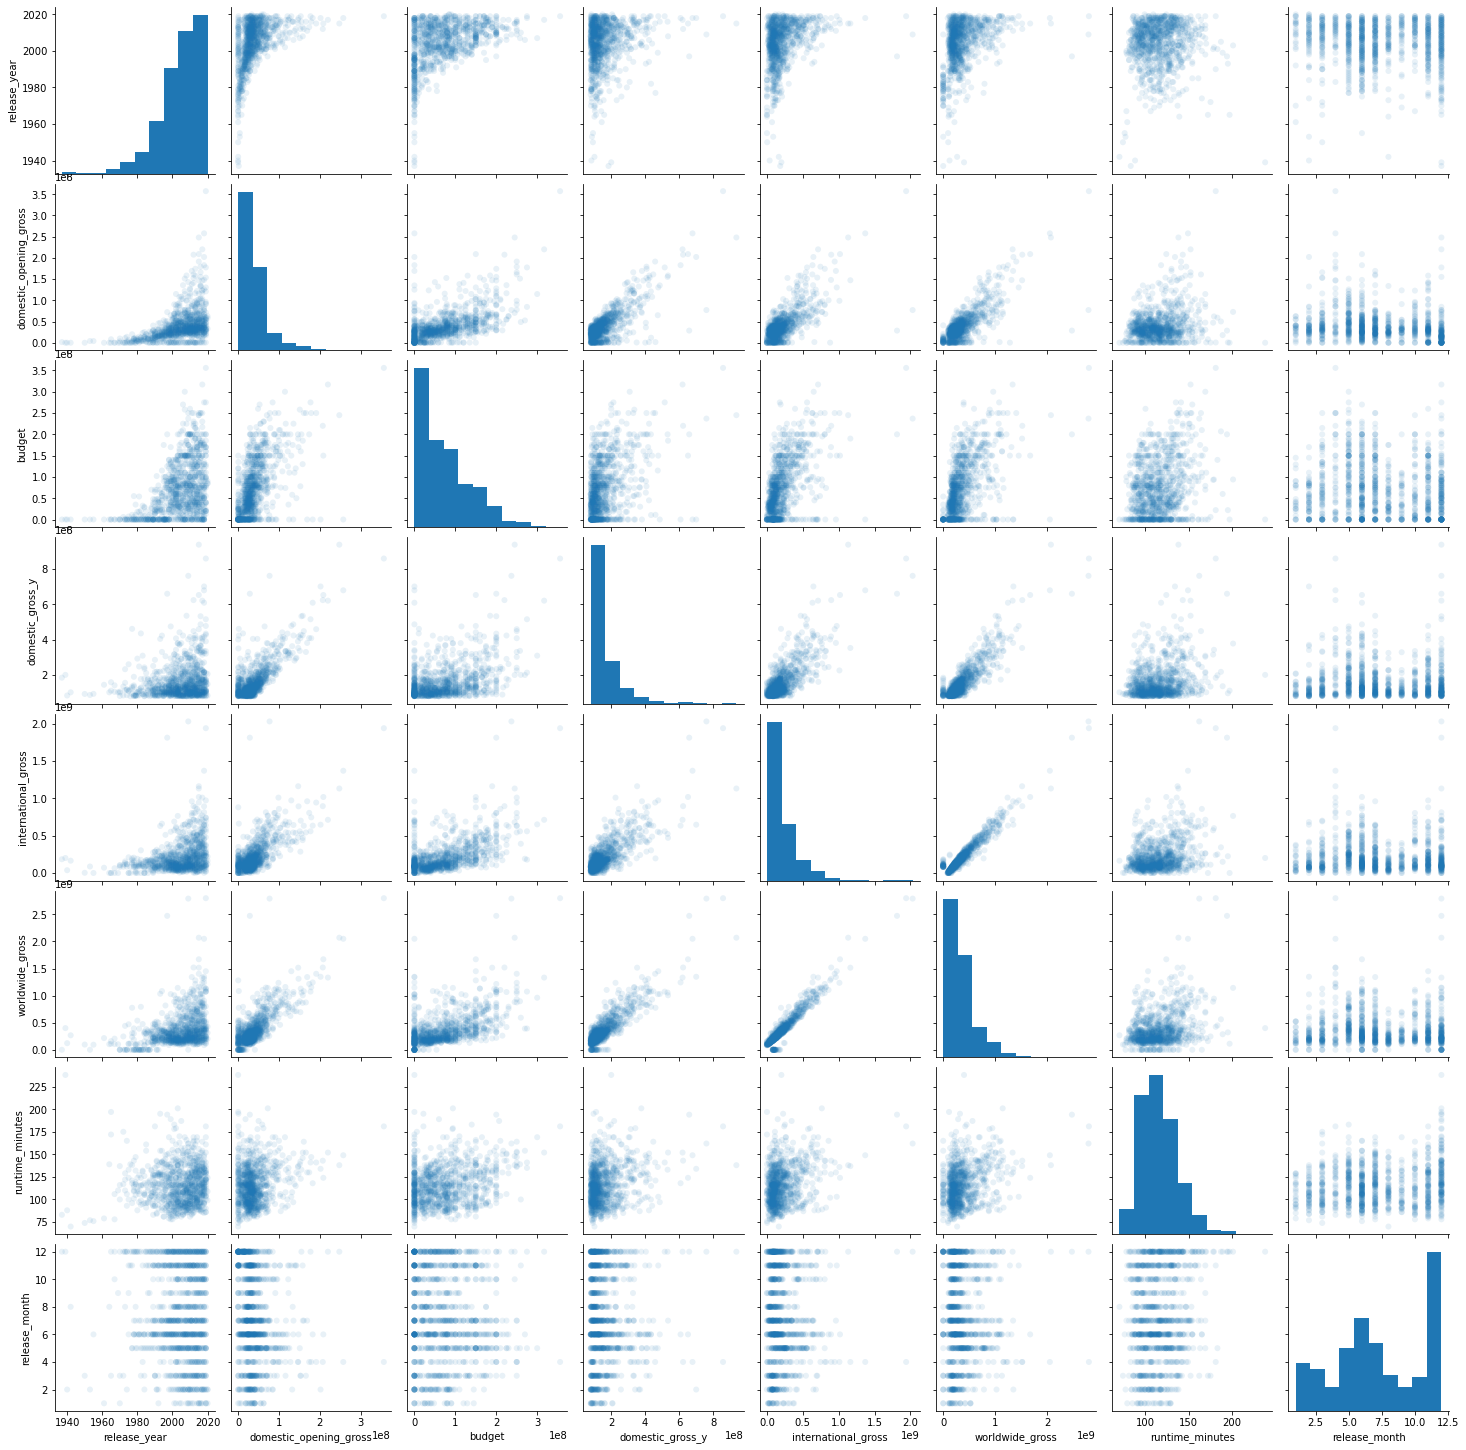

In [13]:
sns.pairplot(df, plot_kws=dict(alpha=0.1, edgecolor='none'))

In [14]:
smaller_df= movies.loc[:,['domestic_opening_gross', 'budget', 'runtime_minutes', 'release_month','worldwide_gross']]

In [15]:
smaller_df.corr()

,domestic_opening_gross,budget,runtime_minutes,release_month,worldwide_gross
domestic_opening_gross,1.000000,0.529977,0.233361,-0.176899,0.770005
budget,0.529977,1.000000,0.289484,-0.065965,0.520349
runtime_minutes,0.233361,0.289484,1.000000,0.161326,0.344280
release_month,-0.176899,-0.065965,0.161326,1.000000,-0.002500
worldwide_gross,0.770005,0.520349,0.344280,-0.002500,1.000000


In [16]:
smaller_df.corr()['worldwide_gross'].sort_values(ascending = False)

worldwide_gross           1.000000
domestic_opening_gross    0.770005
budget                    0.520349
runtime_minutes           0.344280
release_month            -0.002500
Name: worldwide_gross, dtype: float64

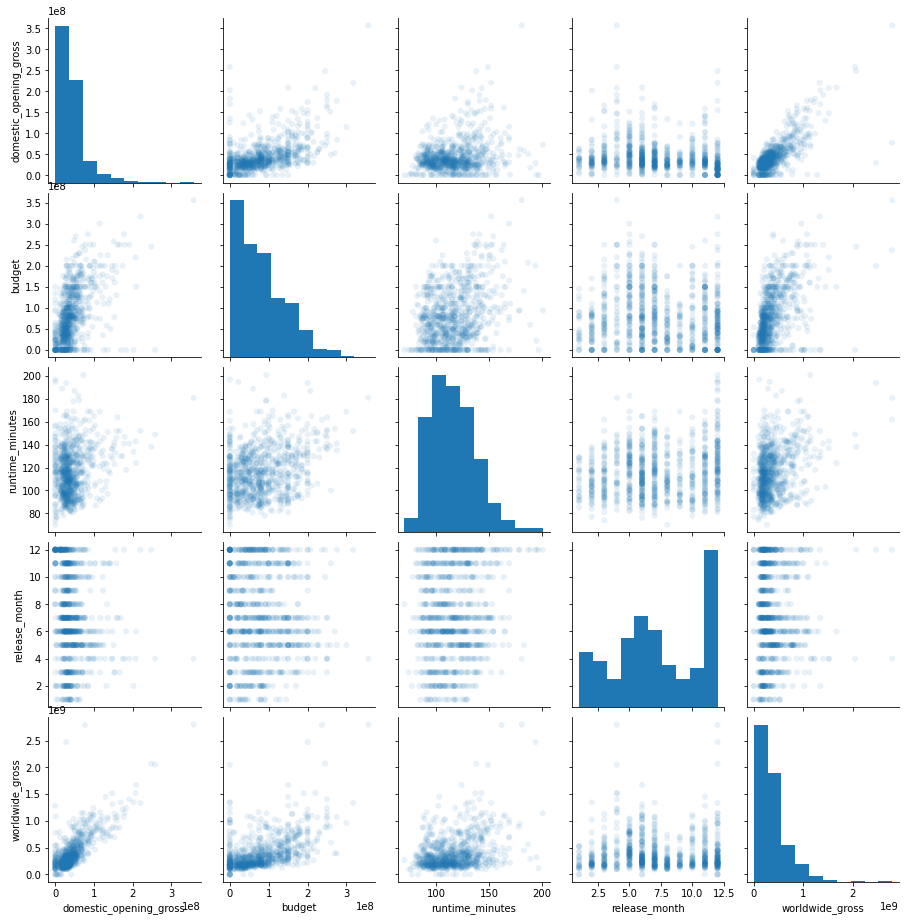

In [17]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=0.1, edgecolor='none'))

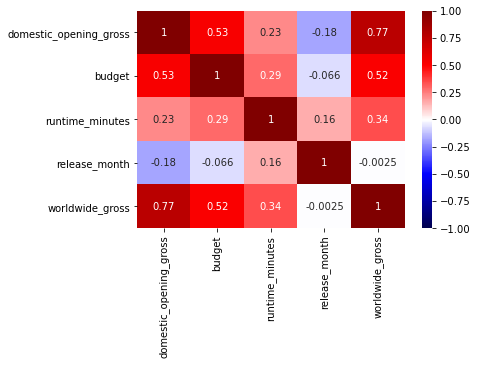

In [18]:
sns.heatmap(smaller_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [21]:
X, y = movies.drop('worldwide_gross',axis=1), movies['worldwide_gross']

X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [19]:
lsm = smf.ols('worldwide_gross~ domestic_opening_gross + budget + runtime_minutes',data = movies)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     483.6
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          6.32e-183
Time:                        06:15:37   Log-Likelihood:                -17407.
No. Observations:                 850   AIC:                         3.482e+04
Df Residuals:                     846   BIC:                         3.484e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.685e+08   3.66e+07     -4.599      0.000    -2.4e+08   -9.66e+07
domestic_opening_gross     5.7287      0.211     27.107      0.000       5.314       6.143
budget                     0.5879      0.122      4.812      0.000       0.348       0.828
runtime_minutes         2.266e+06   3.25e+05      6.979      0.000    1.63e+06     2.9e+06
==============================================================================
Omnibus:                      721.594   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31426.664
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      31.922   Cond. No.                     6.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
movies['runtime_sq'] = np.square(movies.runtime_minutes)
lsm = smf.ols('worldwide_gross~ domestic_opening_gross + budget + runtime_sq', data = movies)
fit2 = lsm.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     493.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          2.97e-185
Time:                        06:15:38   Log-Likelihood:                -17402.
No. Observations:                 850   AIC:                         3.481e+04
Df Residuals:                     846   BIC:                         3.483e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.305e+07   1.88e+07     -2.284      0.023      -8e+07   -6.06e+06
domestic_opening_gross     5.7167      0.210     27.228      0.000       5.305       6.129
budget                     0.5688      0.121      4.684      0.000       0.330       0.807
runtime_sq              1.003e+04   1294.026      7.754      0.000    7493.679    1.26e+04
==============================================================================
Omnibus:                      707.701   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29013.870
Skew:                           3.479   Prob(JB):                         0.00
Kurtosis:                      30.763   Cond. No.                     3.30e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""